# 6.0002 Lecture 9: Understanding Experimental Data

**Speaker:** Prof. Eric Grimson

## Statistics Meets Experimental Science
- conduct an experiment to gather data
    - physical (e.g. in a biology lab)
    - social (e.g. questionnaires)
- use theory to generate some questions about data
    - physical (e.g. gravitational fields)
    - social (e.g. people give inconsistent answers)
- design a computation to help answer questions about data
- consider, for example, a spring

## This kind of spring
- linear spring: amount of force needed to stretch or compress spring is linear in the distance the spring is stretched or compressed
- each spring has a spring constant, $k$ that determines how much force is needed
    - e.g. on a car: $k \approx 35,000$ N/m
    - Newton = force to accelerate 1 kg of mass 1 meter per second per second

## Hooke's Law
- $F = -kd$
- how much does a rider have to weigh to compress spring 1cm?
    - $F = 0.01 \cdot 35000 = 350$ N
    - $F = ma = 350$ N, where $a = 6 = 9.8$ m/s^2
    - so, mass: $m \approx 35.68$ kg

## Finding $k$
- how to calibrate a spring: hang it vertically and tie a mass to it, let it come to rest:
    - $F = -kd$
    - $k = -\frac{F}{d}$
    - $k = 9.81\frac{m}{d}$

## Taking a look at the data

In [1]:
# import necessary libraries
import random, pylab, numpy

In [2]:
# plot parameters

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
pylab.rcParams['legend.numpoints'] = 1

In [3]:
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline() #discard header
    for line in dataFile:
        d, m = line.split()
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

In [4]:
   def labelPlot():
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')

In [5]:
def plotData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yvals = pylab.array(yVals)
    xVals = xVals * 9.81 #acc. due to gravity
    pylab.plot(xVals, yVals, 'bo', label='Meausred displacements')
    labelPlot()

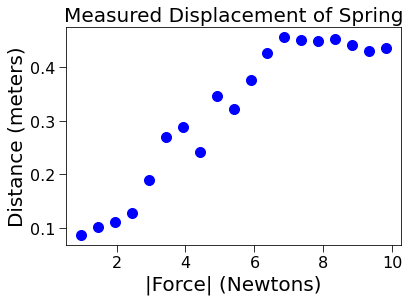

In [6]:
plotData('springData.txt')

- so, despite Hooke's law, we don't see a linear relationship

## Fitting Curves to Data
- when we fit a curve to a set of data, we are finding a fit that relates an independent variable (the mass) to an estimated value of a dependent variable (the distance)
- to decide how well a curve fits the data, we need a way to measure the goodness of fit-- called the **objective function**
- once we define the objective function, we want to find the curve that minimizes it
- in this case, we want to find a line such that some function of the sum of the distances from the line to the measured points is minimized

## Measuring distance
- which should we chose?
- **vertical distance**, because we want to predict dependent Y value for given independent X value, and vertical distance measures error in that prediction

## Least Squares Objective Function
$$\sum_{i=0}^{\textrm{len(observed)}-1}(\textrm{observed}[i] - \textrm{predicted}[i])^2$$
- look familiar?
    - this is the variance times the number of observations
    - so minimizing this will also minimize the variance

## Solving for least squares
- to minimize this objective function, want to find a curve for the predicted observations that leads to minimum value
- use **linear regression** to find a polynomial representation for the predicted model

## Polynomials with One Variable (x)
- 0 or finite number of non-zero terms
- each term of the form cx^p
    - c, the coefficient, a real number
    - p, the degree of the term, a non-negative integer
- the degree of the polynomial is the largest degree of any term
- examples:
    - line: $ax + b$
    - parabola: $ax^2 + bx + x$

## Solving for least squares
- simple example:
    - use a degree-one polonymial, $y = ax + b$, as model of our data (we want best fitting line)
- find values of $a$ and $b$ such that when we use the polynomial to compute $y$ values for all of the $x$ values in our experiment, the squared difference of these **predicted** values and the corresponding **observed** values is minimized
- a **linear regression** problem
- many algorithms for doing this, including one similar to Newton's method
    - (which we saw in 6.0001)

## polyfit
- good news is that pylab provides built-in functions to find these polynomial fits
- pylab.polyfit(observedX, observedY, n)
- finds coefficients of a polynomial of degree $n$, that provides a best least squares fit for the observed data
    - n=1 - best line: $y = ax + b$
    - n=2 - best parabola: $y = ax^2 + bx + c$

## Using polyfit

In [9]:
def fitData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array (yVals)
    xVals = xVals * 9.82 # get force
    pylab.plot(xVals, yVals, 'bo', label='Measured points')
    labelPlot()
    a, b = pylab.polyfit(xVals, yVals, 1)
    estYvals = a*pylab.array(xVals) + b
    print('a =', a, 'b =', b)
    pylab.plot(xVals, estYvals, 'r', 
               label='Linear fit, k =' + str(round(1/a, 5)))
    pylab.legend(loc='best')

a = 0.04638475006252902 b = 0.06562859649122797


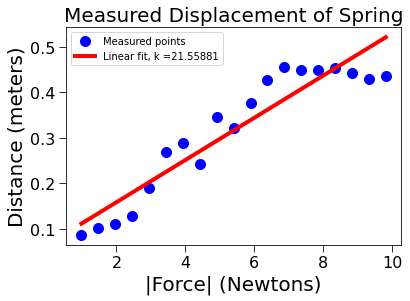

In [10]:
fitData('springData.txt')

## Version using polyval

In [11]:
def fitData1(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81 #get force
    pylab.plot(xVals, yVals, 'bo', 'Measured points')
    labelPlot()
    model = pylab.polyfit(xVals, yVals, 1)
    estYvals = pylab.polyval(model, xVals)
    pylab.plot(xVals, estYvals, 'r', 
              label='Linear fit, k = ' + str(round(1/model[0], 5)))
    pylab.legend(loc='best')

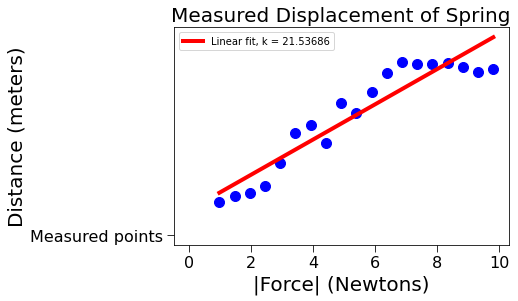

In [12]:
# works the same
fitData1('springData.txt')

## Another experiment with mystery data

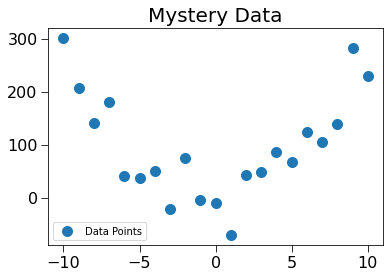

In [14]:
#Demonstration using mystery data
xVals, yVals = getData('mysteryData.txt')
pylab.plot(xVals, yVals, 'o', label = 'Data Points')
pylab.title('Mystery Data')
pylab.legend()

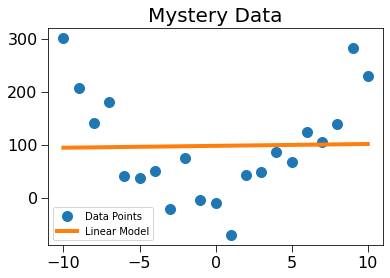

In [16]:
#Try linear model
xVals, yVals = getData('mysteryData.txt')
pylab.plot(xVals, yVals, 'o', label = 'Data Points')
pylab.title('Mystery Data')

model1 = pylab.polyfit(xVals, yVals, 1)
pylab.plot(xVals, pylab.polyval(model1, xVals),
           label = 'Linear Model')
pylab.legend()

## Let's try a higher-degree model

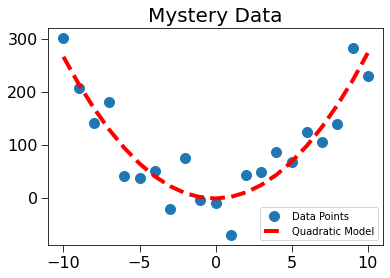

In [17]:
xVals, yVals = getData('mysteryData.txt')
pylab.plot(xVals, yVals, 'o', label = 'Data Points')
pylab.title('Mystery Data')

#Try a quadratic model
model2 = pylab.polyfit(xVals, yVals, 2) # 1 --> 2
pylab.plot(xVals, pylab.polyval(model2, xVals),
           'r--', label = 'Quadratic Model')
pylab.legend()

- quadratic appears to be a better fit
- note that this is still an example of linear regression, even though we are not fitting a line to the data (in this case we are finding the best parabola)

## How good are these fits?
- relative to each other
- in an absolute sense

## Relative to each other
- fit is a function from the independent variable to the dependent variable
- given an independent value, provides an estimate of the dependent value
- which fit provides better estimates
- since we found fit by minimizing mean squared error, could just evaluate goodness of fit by looking at that error

## Comparing Mean Squared Error

In [19]:
def aveMeanSquareError(data, predicted):
    error = 0.0
    for i in range(len(data)):
        error += (data[i] - predicted[i])**2
    return error/len(data)

estYvals = pylab.polyval(model1, xVals)
print('Ave. mean square error for linear model =', 
      aveMeanSquareError(yVals, estYvals))
estYvals = pylab.polyval(model2, xVals)
print('Ave. mean square error for quadratic model =',
      aveMeanSquareError(yVals, estYvals))

Ave. mean square error for linear model = 9372.730789652878
Ave. mean square error for quadratic model = 1524.0204471835434


## In an absolute sense
- mean sequare error useful for comparing two different models for the same data
- useful for getting a sense of absolute goodness of fit?
    - is 1524 good?
- hard to know, since there is no upper bound and not scale independent
- instead we use **coefficient of determination**, $R^2$, defined via:
$$R^2 = 1 - \frac{\sum_i (y_i - p_i)^2}{\sum_i (y_i - \mu)^2}$$
    - 1 minus ratio of error in estimates to variability in measured data
    - $y_i$ are measured values
    - $p_i$ are predicted values
    - $\mu$ is mean of measured values

## If you prefer code

In [20]:
def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum()
    meanError = error/len(observed)
    return 1 - (meanError/numpy.var(observed))

- we are playing a clever trick here:
    - numerator is sum of squared errors
    - dividing by number of samples gives average sum-squared-error
    - denominator is variance times number of samples
    - so mean SSE/variance is same as $R^2$ ratio

## $R^2$
- by comparing the estimation errors (the numerator) with the variability of the original values (the denominator), $R^2$ is intended to capture the proportion of variability in a data set that is accounted for by the statistical model provided by the fit
- always between 0 and 1 when fit generated by a linear regression and tested on training data
    - if $R^2=1$, the model explains all of the variability in the data
    - if $R^2 = 0$, there is no relationship between the values predicted by the model and the actual data
    - if $R^2 = 0.5$, the model explains half the variability in the data

## Testing Goodness of Fits

In [21]:
def genFits(xVals, yVals, degrees):
    models = []
    for d in degrees:
        model = pylab.polyfit(xVals, yVals, d)
        models.append(model)
    return models

def testFits(models, degrees, xVals, yVals, title):
    pylab.plot(xVals, yVals, 'o', label='Data')
    for i in range(len(models)):
        estYVals = pylab.polyval(models[i], xVals)
        error = rSquared(yVals, estYVals)
        pylab.plot(xVals, estYVals, 
                   label='Fit of degree' + str(degrees[i])\
                   + '. R2 = ' + str(round(error,5)))
    pylab.legend(loc='best')
    pylab.title(title)

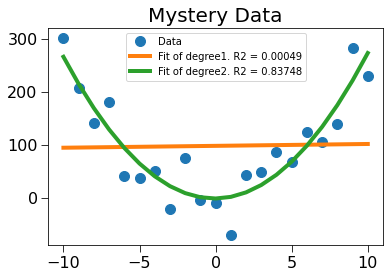

In [22]:
#code for testing goodness of fit to parabolic data
xVals, yVals = getData('mysteryData.txt')
degrees = (1, 2)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')

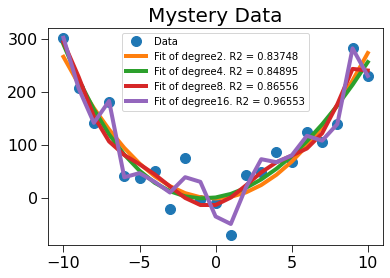

In [23]:
#Compare higher-order fits
degrees = (2, 4, 8, 16)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')